<a href="https://colab.research.google.com/github/pavank-23/21BDS0198_EDA/blob/main/Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis - Theory DA
##### Pavan K - 21BDS0198

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
!wget 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv'

--2024-09-24 20:20:21--  https://raw.githubusercontent.com/salemprakash/EDA/main/Data/penguins_size.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13495 (13K) [text/plain]
Saving to: ‘penguins_size.csv.3’

penguins_size.csv.3 100%[===================>]  13.18K  --.-KB/s    in 0s      

2024-09-24 20:20:22 (64.3 MB/s) - ‘penguins_size.csv.3’ saved [13495/13495]



In [3]:
penguins_df = pd.read_csv('/content/penguins_size.csv')
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex


Before we continue with the analysis, let's encode the categorical for easier replacements

In [5]:
from sklearn.preprocessing import LabelEncoder

for col in ["species", "island", "sex"]:
    le = LabelEncoder()
    penguins_df[col] = le.fit_transform(penguins_df[col])

**Module 2 - Data Transformation**


Handling Missing Values

In [6]:
penguins_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


I. Removing missing data

Removing all the rows with atleast one instance of NaN

In [7]:
removed_df = penguins_df.dropna()
removed_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.1,18.7,181.0,3750.0,2
1,1,2,39.5,17.4,186.0,3800.0,1
2,1,2,40.3,18.0,195.0,3250.0,1
4,1,2,36.7,19.3,193.0,3450.0,1
5,1,2,39.3,20.6,190.0,3650.0,2


In [8]:
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


Removing rows with all values as NaN

In [9]:
removed_df = penguins_df.dropna(how = "all")
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


Removing all removes with a certain precent of NaN values

In [10]:
removed_df = penguins_df.dropna(thresh = 0.7)
removed_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,3
body_mass_g,2
sex,0


II. Replacing Missing Data

For replacing missing data, we'll demonstrate the various techniques one can employ

Imputation - Mean

In [11]:
penguins_df['culmen_length_mm'] = penguins_df['culmen_length_mm'].fillna(penguins_df['culmen_length_mm'].mean())

Imputation - Median

In [12]:
penguins_df['culmen_depth_mm'] = penguins_df['culmen_depth_mm'].fillna(penguins_df['culmen_depth_mm'].mean())

Imputation - Mode

In [13]:
penguins_df['island'] = penguins_df['island'].fillna(penguins_df['island'].mode())

Multiple Imputation

In [14]:
!pip install miceforest

Converting given data to numeric or categorical before applying multiple imputation as ImputationKernel does not take in 'object' dtype from pandas

In [15]:
penguins_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
for col in penguins_df.select_dtypes(include=['object']).columns:
    try:
        penguins_df[col] = pd.to_numeric(penguins_df[col])
    except ValueError:
        penguins_df[col] = penguins_df[col].astype('category')

In [17]:
for col in penguins_df.columns:
  if col not in ['species' , 'sex', 'island']:
    print(min(penguins_df[col]))
    print(min(penguins_df[col]))

32.1
32.1
13.1
13.1
172.0
172.0
2700.0
2700.0


In [18]:
penguins_df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,3
body_mass_g,2
sex,0


In [19]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.10000,18.70000,181.0,3750.0,2
1,1,2,39.50000,17.40000,186.0,3800.0,1
2,1,2,40.30000,18.00000,195.0,3250.0,1
3,1,2,43.92193,17.15117,NaN,NaN,3
4,1,2,36.70000,19.30000,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,3,0,43.92193,17.15117,NaN,NaN,3
340,3,0,46.80000,14.30000,215.0,4850.0,1
341,3,0,50.40000,15.70000,222.0,5750.0,2
342,3,0,45.20000,14.80000,212.0,5200.0,1


In [20]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
  data = penguins_df,
  random_state = 42
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [21]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.10000,18.70000,181.0,3750.0,2
1,1,2,39.50000,17.40000,186.0,3800.0,1
2,1,2,40.30000,18.00000,195.0,3250.0,1
3,1,2,43.92193,17.15117,191.0,3550.0,3
4,1,2,36.70000,19.30000,193.0,3450.0,1



**Module 3 - Correlation Analysis and Time Series Analysis** and **Module 4 - Data Summarization and Visualization**

Univariate Analysis

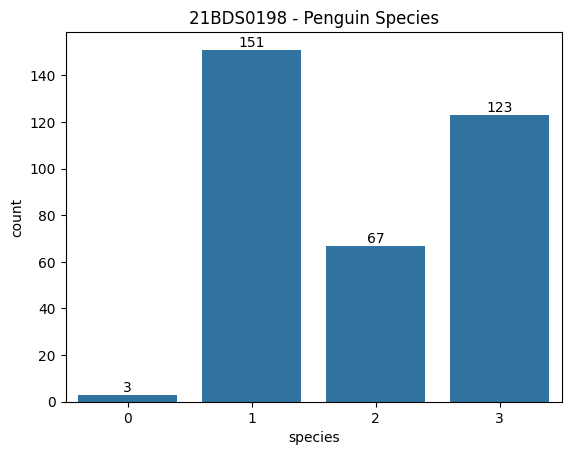

In [22]:
ax = sns.countplot(data = penguins_df, x = "species")
ax.bar_label(ax.containers[0])
ax.set(title = "21BDS0198 - Penguin Species")
plt.show()

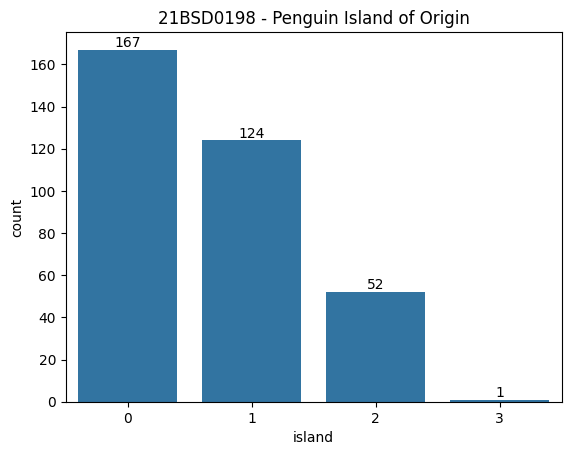

In [23]:
ax = sns.countplot(data = penguins_df, x="island")
ax.bar_label(ax.containers[0])
ax.set(title = "21BSD0198 - Penguin Island of Origin")
plt.show()

Bivariate Analysis

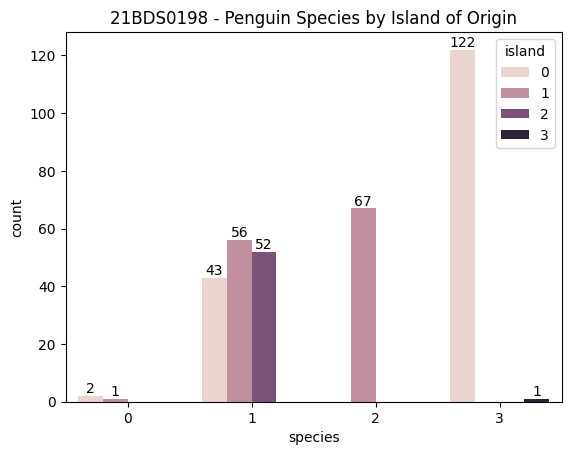

In [24]:
ax = sns.countplot(data = penguins_df, x = "species", hue = "island")
ax.set(title="21BDS0198 - Penguin Species by Island of Origin")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

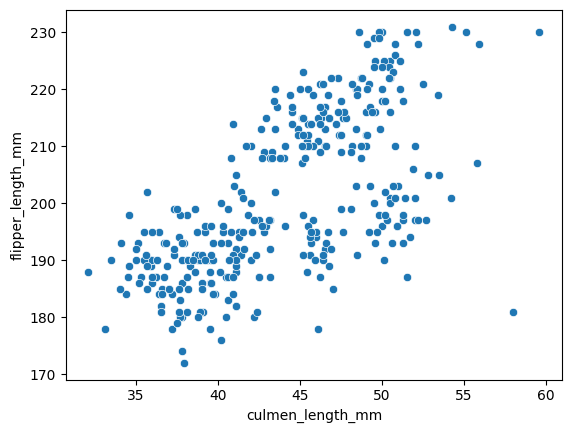

In [25]:
sns.scatterplot(x = "culmen_length_mm", y = "flipper_length_mm", data = penguins_df)

<Axes: xlabel='species', ylabel='body_mass_g'>

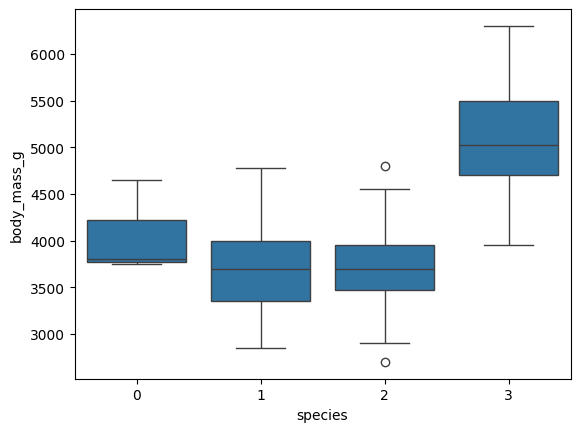

In [26]:
sns.boxplot(x = "species", y = "body_mass_g", data = penguins_df)

Multivariate Analysis

In [ ]:
ax = sns.pairplot(penguins_df, kind = "reg")
ax.fig.suptitle("21BDS0198 -  Pair Plot")
plt.show()

Correlation (2D Statistical Analysis)

In [ ]:
correlation = penguins_df.corr(method = 'pearson', numeric_only = True)
correlation

In [ ]:
corr_matrix = penguins_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('21BDS0198 - Correlation Matrix')
plt.show()

Summarized Data

In [ ]:
penguins_df.describe(include = 'all')